In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import os
import re
from itertools import combinations

import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
ALPHANUM_REGEX = re.compile('[\W+]', re.UNICODE)

In [4]:
def to_tokens(s):
    return set(ALPHANUM_REGEX.sub(' ', s).lower().split())

In [5]:
def jaccard_distance(x, y):    
    return 1 - (len(x['tokens'] & y['tokens']) / len(x['tokens'] | y['tokens']))

In [6]:
ARTICLES = []

for el in os.listdir('data'):
    with open(os.path.join('data', el)) as f:
        soup = BeautifulSoup(f.read(), 'html.parser')
        text = soup.get_text()
        tokens = to_tokens(text)

        fake = el.startswith('fake')
        id_ = el[5:7]

        ARTICLES.append({'id_': id_, 'fake': fake, 'tokens': tokens, 'text': text, 'soup': soup})

In [7]:
DISTANCES = [jaccard_distance(x, y) for x, y in combinations(ARTICLES, 2)]

In [8]:
Z_COMPLETE = linkage(DISTANCES, method='complete')

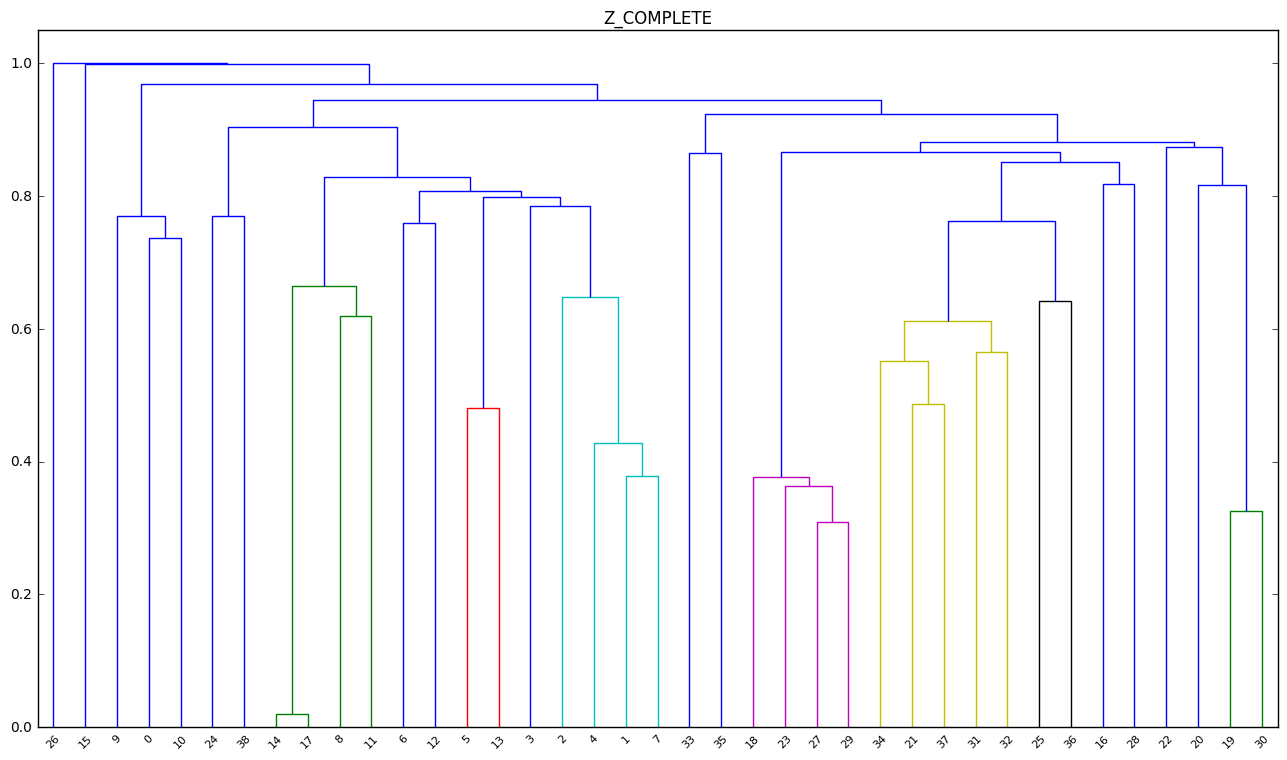

In [9]:
plt.figure(figsize=(16, 9))
plt.title('Z_COMPLETE')
dendrogram(Z_COMPLETE)
plt.show()

In [18]:
for i in [18, 23, 27, 29]:
    print('FAKE:' if ARTICLES[i]['fake'] else 'REAL:', ARTICLES[i]['soup'].title.get_text()[-105:])

REAL: story of corruption is mind-boggling. So why is Clinton supposedly the corrupt one? - The Washington Post
REAL: uit Power’ flashmob video for Hillary Clinton: Two women, 170 dancers and no police - The Washington Post
REAL:  ad: If Trump becomes president, ‘you better hope there’s someone left to help you’ - The Washington Post
REAL:  He fought in World War II. He died in 2014. And he just registered to vote in Va. - The Washington Post


In [19]:
for i in [1, 2, 4, 7]:
    print('FAKE:' if ARTICLES[i]['fake'] else 'REAL:', ARTICLES[i]['soup'].title.get_text()[-105:])

FAKE: : Hillary’s ISIS Email Just Leaked & It’s Worse Than Anyone Could Have Imagined… | EndingFed News Network
FAKE: Page not found | EndingFed News Network
FAKE: ed millions from Clinton Foundation, his brother’s law firm does Clinton’s taxes | EndingFed News Network
FAKE: BREAKING: Fraudulent Clinton Votes Discovered By The “Tens Of Thousands” | EndingFed News Network


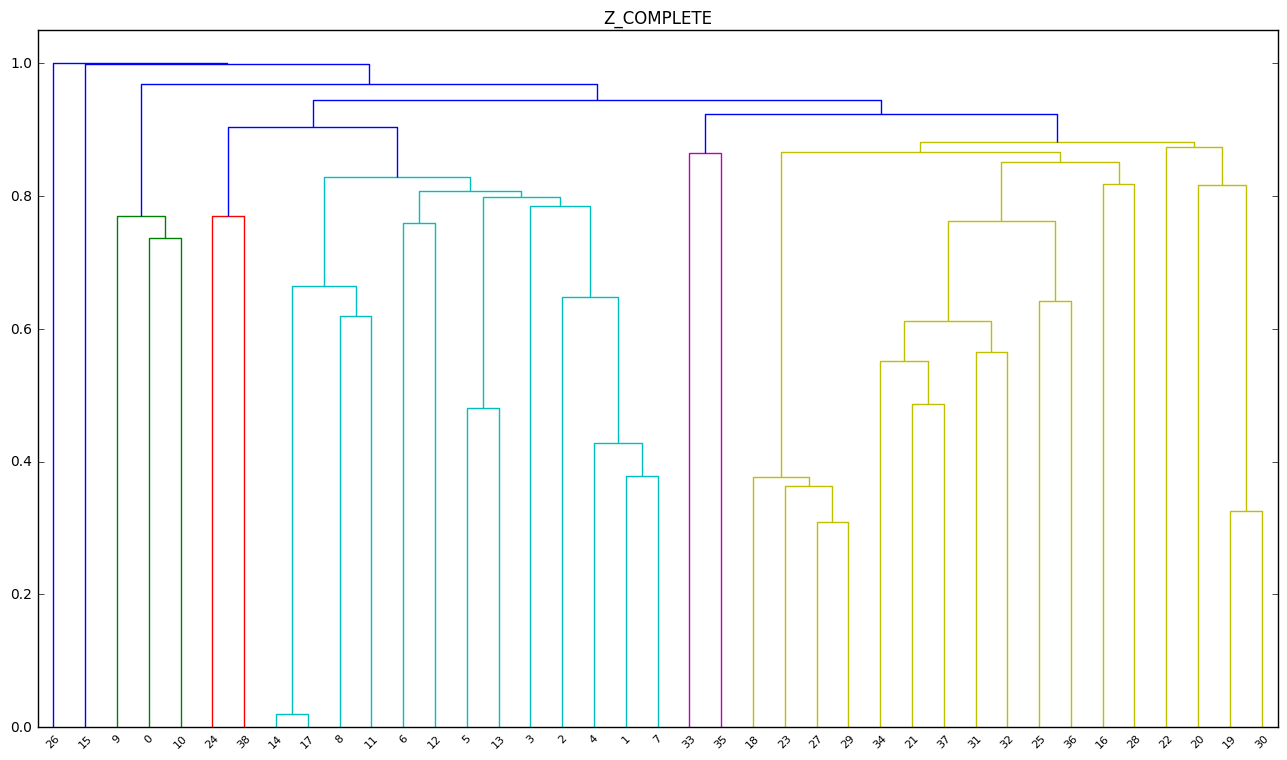

In [12]:
plt.figure(figsize=(16, 9))
plt.title('Z_COMPLETE')
dendrogram(
    Z_COMPLETE,
    color_threshold=0.9*max(Z_COMPLETE[:, 2])),
plt.show()

In [20]:
for i in [18, 23, 27, 29, 34, 21, 37, 31, 32, 25, 36, 16, 28, 22, 20, 19, 30]:
    print('FAKE:' if ARTICLES[i]['fake'] else 'REAL:', ARTICLES[i]['soup'].title.get_text()[-105:])

REAL: story of corruption is mind-boggling. So why is Clinton supposedly the corrupt one? - The Washington Post
REAL: uit Power’ flashmob video for Hillary Clinton: Two women, 170 dancers and no police - The Washington Post
REAL:  ad: If Trump becomes president, ‘you better hope there’s someone left to help you’ - The Washington Post
REAL:  He fought in World War II. He died in 2014. And he just registered to vote in Va. - The Washington Post
REAL: Donald and Billy on the Bus - The New York Times
REAL: I Ran the C.I.A. Now I’m Endorsing Hillary Clinton. - The New York Times
REAL: Donald Trump Voters, Just Hear Me Out - The New York Times
REAL: Why Donald Trump Should Not Be President - The New York Times
REAL: Hillary Clinton for President - The New York Times
REAL: n Leaders Don’t Support Donald Trump. Here’s When They Reached Their Breaking Point. - The New York Times
REAL: A Week of Whoppers From Donald Trump - The New York Times
FAKE: o Saudi Arabia, Hillary’s Clinton Foundation Ti

In [21]:
for i in [14, 17, 8, 11, 6, 12, 5, 13, 3, 2, 4, 1, 7]:
    print('FAKE:' if ARTICLES[i]['fake'] else 'REAL:', ARTICLES[i]['soup'].title.get_text()[-105:])

FAKE: Page not found - World Politicus
FAKE: Page not found - World Politicus
FAKE: President Obama Confirms He Will Refuse To Leave Office If Trump Is Elected
FAKE: y’s Email Case Got Reopened And James Comey Asked For Immunity. Trey Gowdy Says Hell No. | Yes I'm Right.
FAKE: n 2013: “I Would Like To See People Like Donald Trump Run For Office; They’re Honest And Can’t Be Bought”
FAKE: Hey Hillary, thanks for telling the world America’s response time for a nuclear launch – twitchy.com
FAKE: ISIS Leader Calls for American Muslim Voters to Support Hillary Clinton – World News Daily Report
FAKE: Rupaul claims Trump touched him inappropriately in the 1990s – World News Daily Report
FAKE: Page not found - Denver Guardian
FAKE: Page not found | EndingFed News Network
FAKE: ed millions from Clinton Foundation, his brother’s law firm does Clinton’s taxes | EndingFed News Network
FAKE: : Hillary’s ISIS Email Just Leaked & It’s Worse Than Anyone Could Have Imagined… | EndingFed News Network
FAK